<a href="https://colab.research.google.com/github/EhsanJabbar/Computational-Projects/blob/main/Logistic_regression_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [ ]:
#importing data set
url = '/content/titanic_dataset.csv'

In [ ]:
#reading the data
data = pd.read_csv('/content/titanic_dataset.csv')
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.shape


(891, 12)

In [ ]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking Missing values


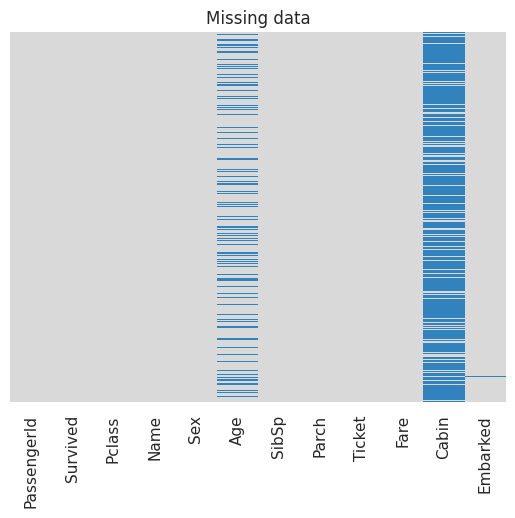

In [ ]:
#checking missing values using heat map in seaborn
sns.heatmap(data.isnull(), yticklabels= False, cbar= False, cmap = 'tab20c_r')
plt.title("Missing data")
plt.show()

# Age by Passenger

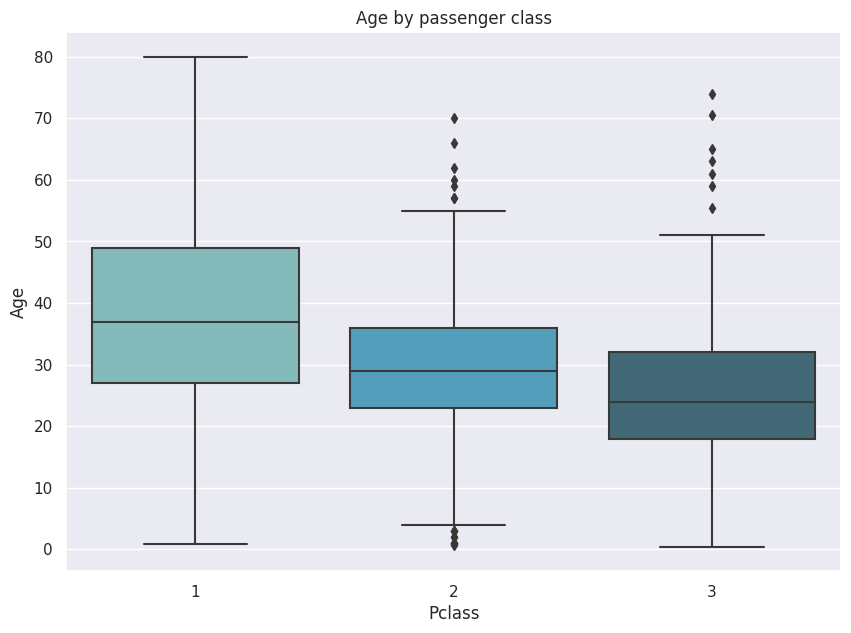

In [ ]:
plt.figure(figsize = (10,7))

sns.boxplot( x = 'Pclass', y = 'Age', data = data, palette = 'GnBu_d').set_title("Age by passenger class")
plt.show()

In [ ]:
#function for imputing age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
data['Age']=data[['Age','Pclass']].apply(impute_age, axis =1 )

In [ ]:
data.drop('Cabin', axis = 1, inplace = True)
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
 data.drop(['PassengerId', 'Name'], axis = 1, inplace = True)


In [ ]:
display(data)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,24.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [ ]:
data.drop('Ticket', axis = 1 , inplace = True)


In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Converting gender and embark into category

In [ ]:
#make a list of all column you want to convert
objcat = ['Embarked', 'Sex']
for cname in objcat:
  data[cname] = data[cname].astype('category')

In [ ]:
#making another dummy variable for categorical sex and embarked columns
sex = pd.get_dummies(data['Sex'], drop_first = True )
embarked = pd.get_dummies(data['Embarked'], drop_first = True) #using drop_first to avoid multicollinearity in two columns


In [ ]:
#concatinating sex, embarked categorical columns in already existed data
data = pd.concat([data, sex, embarked], axis = 1)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
data.shape

(891, 11)

In [ ]:
data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
data.shape

(891, 9)

In [ ]:
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.007763
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
male,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,0.007763,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


# Lets Split the data for model

In [ ]:
#splitting the data into train and testing set
# x is for input
x = data.drop('Survived', axis = 1)
# y is for output/predicted
y = data['Survived']
#importing library to run data as input and output

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 101)


In [ ]:
#importing model from sklearn library
from sklearn.linear_model import LogisticRegression
#create variable for model
lgreg = LogisticRegression()

#passing training data to model
lgreg.fit(x_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = lgreg.predict(x_test)
print(y_predict)

[0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0]


In [ ]:
#now checking the accuracy of our model test result
from sklearn.metrics import classification_report , accuracy_score

print('classification model')
# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_predict) * 100,2)
print('Accuracy', logreg_accuracy,'%')

classification model
--------------------------------------------------------------------------------
Accuracy 82.12 %


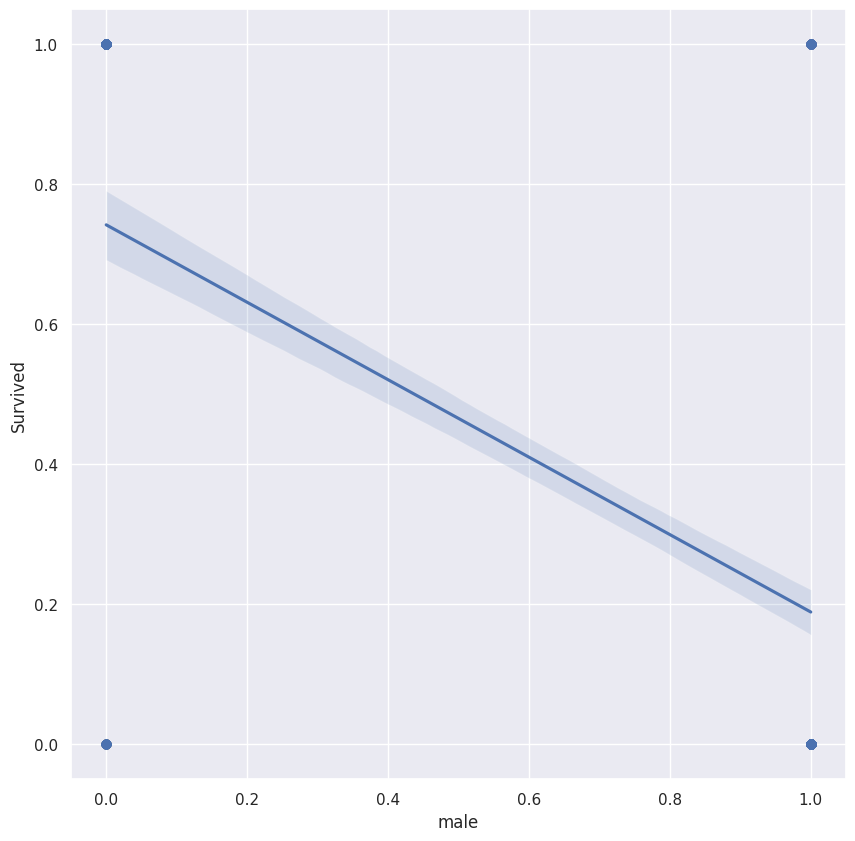

In [ ]:
plt.subplots(figsize=(10, 10))
sns.regplot(x="male", y="Survived", data= data)
plt.show()